<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Isidora Luck
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `https://github.com/IsidoraLuck/MDS7202.git`


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
%%writefile requirements.txt
attrs==23.1.0
contourpy==1.1.1
cycler==0.12.0
et-xmlfile==1.1.0
fastjsonschema==2.18.0
fonttools==4.43.0
importlib-resources==6.1.0
jsonschema==4.19.1
jsonschema-specifications==2023.7.1
kiwisolver==1.4.5
matplotlib==3.8.0
missingno==0.5.2
nbformat==5.9.2
numpy==1.26.0
openpyxl==3.1.2
pandas==1.2.0
Pillow==10.0.1
plotly==5.17.0
pyparsing==3.1.1
pytz==2023.3.post1
referencing==0.30.2
rpds-py==0.10.3
scipy==1.11.3
seaborn==0.13.0
tenacity==8.2.3
tzdata==2023.3
xlrd==2.0.1


Overwriting requirements.txt


In [2]:
!pip install -r requirements.txt


In [3]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [4]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/online_retail_II.pickle'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [5]:
df_retail = pd.read_pickle(path)
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Análisis Explotatorio de los Datos [0.5 puntos]

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El análisis univariado implica el estudio de una única variable a la vez, mientras que el análisis multivariado involucra la relación entre múltiples variables simultáneamente, como la correlaciones entre columnas. Los datos faltantes se refieren a valores Nan en el conjunto de datos. Estos análisis ayudan a observar anomalías (outliers), entender la estructura de los datos (como se distribuyen o estan compuestos) y determinar si se requiere limpiar o imputar datos faltantes (nivel de información faltante), tambien sirven para conocer relaciones entre los datos.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie.

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [6]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada

        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")

    else:
            count = (
                serie.value_counts()[0:100]
                .reset_index()
                .rename(columns = {serie.name: 'Count'})
            )
            fig = px.bar(
                x=count['index'].astype(str),
                y=count["Count"],
                title=f"100 Most common categories of {serie.name}",
            )

    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [7]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations    525461.000000
Mean                           4.688834
Std                          146.126914
Min                       -53594.360000
25%                            1.250000
50%                            2.100000
75%                            4.210000
Max                        25111.090000
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

El precio tiene una alta presencia de outliers, teniendo que se concentra principalmente entre 0 y 20, su distribución en este segmento no es normal, se contaba con 3 datos con valores negativos y 3687 datos iguales a 0, el 99.81 % de las filas se encuentra duplicadas, esto quiere decir que muchos precios se encuentran repetidos. Esta columna no requiere de limpieza de duplicados, pero si podrían eliminarse los precios menores o iguales a 0 y los outliers correspondientes principalmente a datos de precios mayores a 20. No hay datos faltantes.


In [8]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

Se tiene en Invoice que el 98.48 % de los datos se encuentran duplicados, es decir, se puede encontrar una factura en multiples ocasiones, teniendo que la repetición indicaria el numero de productos distintos llevados, aún así podrían existir datos repetidos, pero la mayor boleta es por una cantidad de productos de 675. Cabe destacar que no hay datos faltantes.

In [9]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

No se observan valores faltantes en esta variable. Sin embargo, casi el 99.92% de las filas son duplicados, lo que indica que muchos códigos de stock se repiten. Se tiene que el código con más repeticiones se encuentra 3516 veces.

In [10]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

No se observan valores faltantes en esta variable. Sin embargo, casi el 99.95% de las filas son duplicadas, lo que sugiere que muchas descripciones se repiten en el conjunto de datos, lo que indica que hay productos que se llevan más que otros.

In [11]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations    525461.000000
Mean                          10.337667
Std                          107.424110
Min                        -9600.000000
25%                            1.000000
50%                            3.000000
75%                           10.000000
Max                        19152.000000
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Se pueden observar cantidades negativas correspondientes al 2.35% de los datos (podrían ser devoluciones), por otra parte, se observan multiples outliers, encontrando algunos luego de su limpieza. Los datos se concentran en el lado izquierdo, teniendo una cola más larga en el lado derecho.

In [12]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

No hay valores faltantes, por otra parte, al ser rangos de fechas se pueden ver que el 99.04% de las filas son duplicados, teniendo que hay temporadas de mayores ventas como es del 7 al 20 de noviembre.

In [13]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Se observa que aproximadamente el 20.54% de las celdas están vacias, y casi el 99.97% de las filas son duplicados, lo que sugiere que muchos clientes se repiten en el conjunto de datos.

In [14]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

No hay datos nulos, hay 40 paises teniendo que United Kingdom es el más repetidos, todas las filas estan repetidas.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [15]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)


    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i])
            plt.ylabel(list_type[j])
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

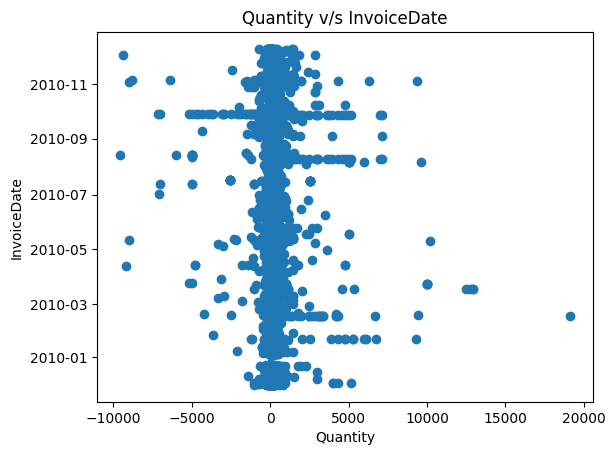

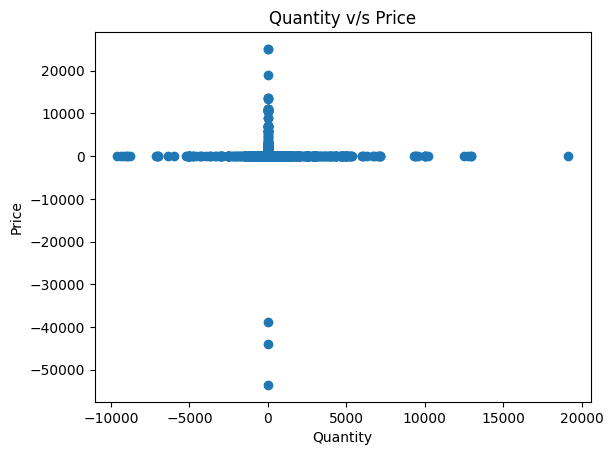

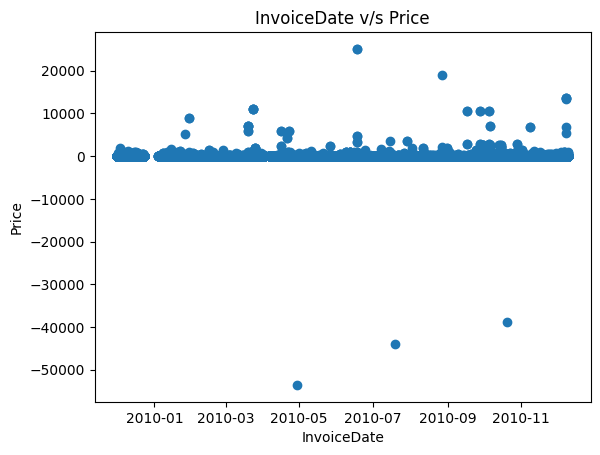

## Correlation:

## Missing Matrix:

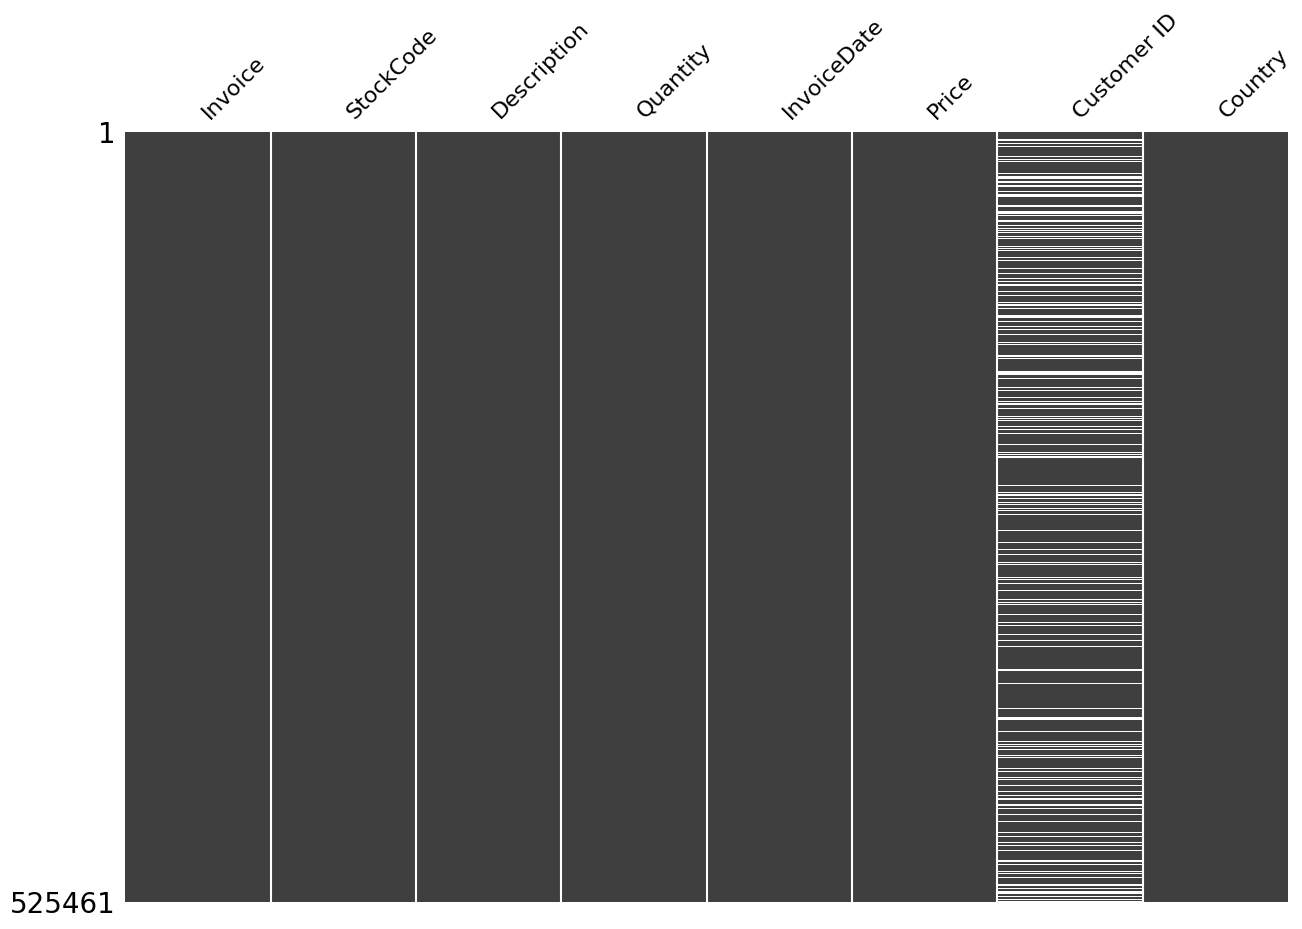

In [16]:
profile_df(df_retail)

La cantidad va variando en el tiempo, pero ronda normalmente el 0, los precios y las cantidades no tienen una tendencia fija, para precio 0 las cantidades varían, mientras que para cantidad 0 el precio varía, esto se confirma al ver que la correlación entre ambos es 0. Los precios tambien varian en el tiempo, teniendo algunas fechas con aumentos, pero no son notorias o no presentan una tendencia. Finalmente se ven valores faltantes en customer ID.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [17]:
def clean_dataset(df):
    df_cleaned = df[df['Quantity'] >= 0]
    df_cleaned = df_cleaned[df_cleaned['Quantity'] <= 100]
    df_cleaned = df_cleaned[df_cleaned['Price'] < 40]
    df_cleaned = df_cleaned.dropna(subset=['Customer ID'])

    return df_cleaned


In [18]:
df= clean_dataset(df_retail)

In [29]:
profile_serie(df['Description'])

## Description Profile

Type                                                  object
Number of observations                                401850
Unique                                                  4416
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3096
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        401638
Duplicate rows (%)                                   99.95 %
Total size in memory                           6429600 bytes
dtype: object

## Bivariant Analysis:

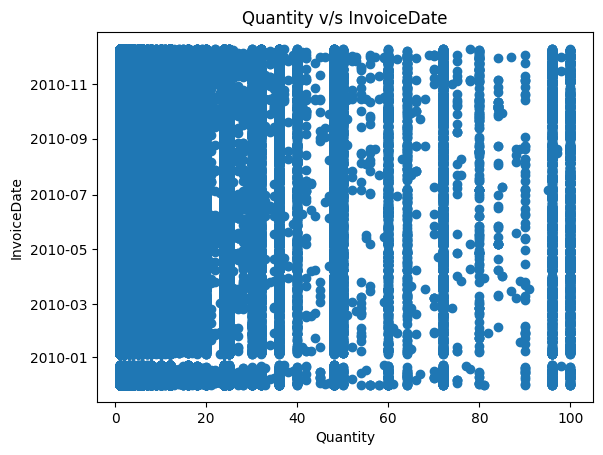

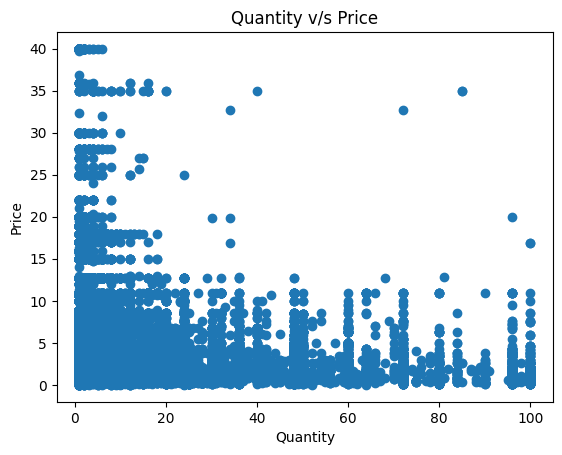

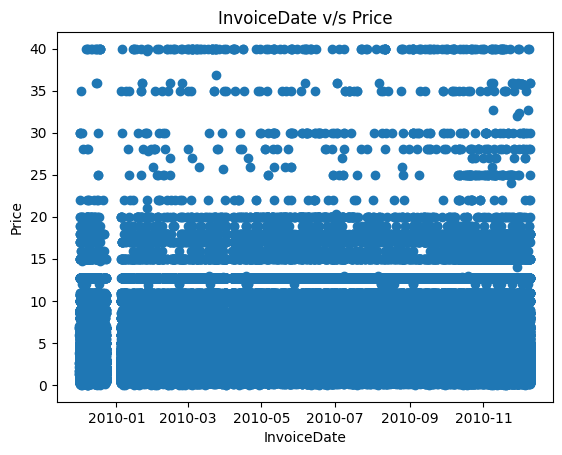

## Correlation:

## Missing Matrix:

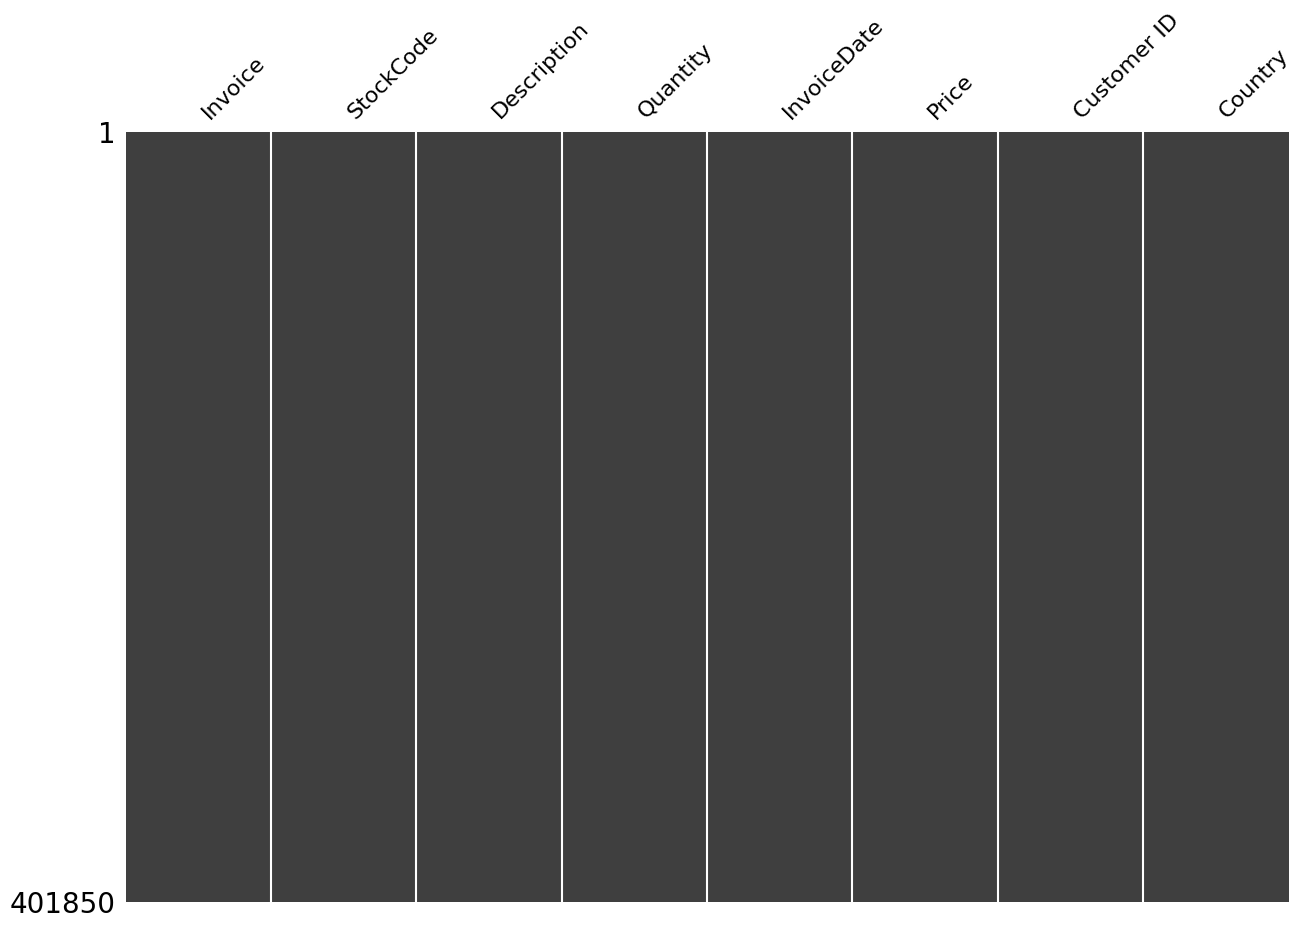

In [19]:
profile_df(df)

La cantidad va variando en el tiempo, teniendo periodos con más ventas, los precios y las cantidades no estan correlacionados negativamente, esto vario gracias a la eliminación de outliers, es decir, ahora se tiene que a menor precio se vende más y a mayor precio se vende menos. Los precios tambien varian en el tiempo, teniendo algunas fechas con aumentos, pero no son notorias o no presentan una tendencia. Finalmente se eliminaron los valores faltantes en customer ID.


### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [30]:
df_retail['TotalRevenue'] = df_retail['Quantity'] * df_retail['Price']

product_revenue = df_retail.groupby('Description')['TotalRevenue'].sum().reset_index()

top_products = product_revenue.sort_values(by='TotalRevenue', ascending=False).head(30)

In [31]:
fig = px.bar(top_products, x='TotalRevenue', y='Description', orientation='h', title='Top 30 Productos por Ganancias')
fig.update_layout(xaxis_title='Ingresos', yaxis_title='Nombre del Producto')
fig.show()

El segundo producto con más retorno, es el que se encuentra más repetido en cuano a ventas, teniendo que sus retornos se explican por eso, sin embargo, el primer producto no es el más vendido (es el segundo más vendido), es por eso que este debe tener un precio mayor que explica un retorno mayor que el segundo producto. El tercer producto no se encuentra entre los más vendidos, destcando por su precio en ganacias. Al final, hay algunos que se destacan por precio y otros por cantidades vendidas, no todos se encontraban entre los más vendidos.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

Considere las ventas como las ganancias (ventas del día)

In [27]:
def plot_ventas(dataframe):
    dataframe['Año'] = dataframe['InvoiceDate'].dt.year
    dataframe['Mes'] = dataframe['InvoiceDate'].dt.month
    dataframe['Día'] = dataframe['InvoiceDate'].dt.day

    ventas_diarias = dataframe.groupby(['Año', 'Mes', 'Día'])['TotalRevenue'].sum().reset_index()

    ventas_diarias['Fecha'] = pd.to_datetime(ventas_diarias[['Año', 'Mes', 'Día']].rename(columns={'Año': 'year', 'Mes': 'month', 'Día': 'day'}))

    fig = px.line(ventas_diarias, x='Fecha', y='TotalRevenue', title='Ventas Diarias a lo largo del tiempo')
    fig.show()

In [32]:
plot_ventas(df_retail)

In [ ]:
df['TotalRevenue'] = df['Quantity'] * df['Price']

In [33]:
plot_ventas(df)

En los datos sin limpieza, se pueden observar 3 ocasiones donde las ganancias son negativas, a finales de año septiembre-noviembre las ganancias tienden a aumentar.

In [34]:
def plot_ventasq(dataframe):
    dataframe['Año'] = dataframe['InvoiceDate'].dt.year
    dataframe['Mes'] = dataframe['InvoiceDate'].dt.month
    dataframe['Día'] = dataframe['InvoiceDate'].dt.day

    ventas_diarias = dataframe.groupby(['Año', 'Mes', 'Día'])['Quantity'].sum().reset_index()

    ventas_diarias['Fecha'] = pd.to_datetime(ventas_diarias[['Año', 'Mes', 'Día']].rename(columns={'Año': 'year', 'Mes': 'month', 'Día': 'day'}))

    fig = px.line(ventas_diarias, x='Fecha', y='Quantity', title='Ventas Diarias a lo largo del tiempo')
    fig.show()

In [36]:
plot_ventasq(df)

In [35]:
plot_ventasq(df_retail)

Observando las ventas como cantidad, se tiene que el 27 de septiembre se disparan para tener una baja notoria el 28 de septiembre, si los articulos se almacenan con cantidades negativas que indiquen devolución (es decir, se admiten valores menores a 0), se tendía que podría deberse a la devolucion de ventas realizadas el día anterior, si en este grafico se cuenta con valores a tipicos que indican días con mayor actividad.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>